In [2]:
import os
import requests
import zipfile
import pandas as pd

def download_file(url, output_path):
    """Download file from a URL if it does not exist."""
    if not os.path.exists(output_path):
        print(f"Downloading from {url} ...")
        response = requests.get(url, stream=True)
        response.raise_for_status()
        with open(output_path, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    f.write(chunk)
        print(f"Downloaded file to {output_path}.")
    else:
        print(f"File already exists: {output_path}")

def extract_zip(zip_path, extract_to):
    """Extract zip file."""
    if not os.path.exists(extract_to):
        os.makedirs(extract_to, exist_ok=True)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Extracted {zip_path} to {extract_to}.")

def find_file_in_directory(directory, filename):
    """Search recursively for filename in directory."""
    for root, dirs, files in os.walk(directory):
        if filename in files:
            return os.path.join(root, filename)
    return None

# --- MovieLens 1M Dataset ---
movielens_url = "https://files.grouplens.org/datasets/movielens/ml-1m.zip"
movielens_zip_path = "ml-1m.zip"
movielens_extract_dir = "ml-1m"

download_file(movielens_url, movielens_zip_path)
extract_zip(movielens_zip_path, movielens_extract_dir)

ratings_path = find_file_in_directory(movielens_extract_dir, "ratings.dat")
movies_path = find_file_in_directory(movielens_extract_dir, "movies.dat")

if ratings_path is None or movies_path is None:
    raise FileNotFoundError("Could not find ratings.dat or movies.dat")

# Read MovieLens data; ratings use "::" as delimiter.
ratings = pd.read_csv(ratings_path, sep="::", engine='python',
                      names=["UserID", "MovieID", "Rating", "Timestamp"])
# The movies file is latin-1 encoded.
movies = pd.read_csv(movies_path, sep="::", engine='python',
                     names=["MovieID", "Title", "Genres"], encoding='latin-1')

print("=== MovieLens Ratings ===")
print(ratings.head())
print("\n=== MovieLens Movies ===")
print(movies.head())
print("\n=== Ratings Summary ===")
print(ratings.describe())

# --- MIND Dataset ---
# For MIND, downloaded the MIND-small dataset from Kaggle manually:
# Placed the downloaded file (e.g., 'MINDsmall.zip') into your working directory.

mind_zip_path = "MINDsmall_train.zip"
mind_extract_dir = "MINDsmall"

if os.path.exists(mind_zip_path):
    extract_zip(mind_zip_path, mind_extract_dir)
else:
    print("MINDsmall.zip not found. Please download it from Kaggle and place it in the working directory.")

# For MIND, the files are:
behaviors_path = os.path.join(mind_extract_dir, "behaviors.tsv")
news_path = os.path.join(mind_extract_dir, "news.tsv")

if not os.path.exists(behaviors_path):
    behaviors_path = find_file_in_directory(mind_extract_dir, "behaviors.tsv")
if not os.path.exists(news_path):
    news_path = find_file_in_directory(mind_extract_dir, "news.tsv")

if behaviors_path is None or news_path is None:
    raise FileNotFoundError("Could not locate behaviors.tsv or news.tsv in MIND dataset.")

behaviors = pd.read_csv(behaviors_path, sep="\t")
news = pd.read_csv(news_path, sep="\t")

print("\n=== MIND Behaviors ===")
print(behaviors.head())
print("\n=== MIND News ===")
print(news.head())
print("\n=== News Data Summary ===")
print(news.describe(include='all'))


File already exists: ml-1m.zip
Extracted ml-1m.zip to ml-1m.
=== MovieLens Ratings ===
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

=== MovieLens Movies ===
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

=== Ratings Summary ===
             UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00 

MovieLens Ratings Head:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

MovieLens Movies Head:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

Ratings Summary:
             UserID       MovieID        Rating     Timestamp
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  9.722437e+08
std    1.728413e+03  1.096041e+03  1.117102e+00  1.215256e

<ipython-input-5-90e05cdea255>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=ratings, palette="viridis")


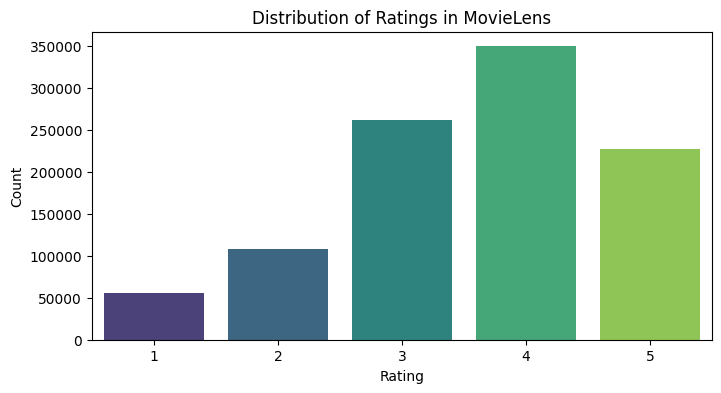

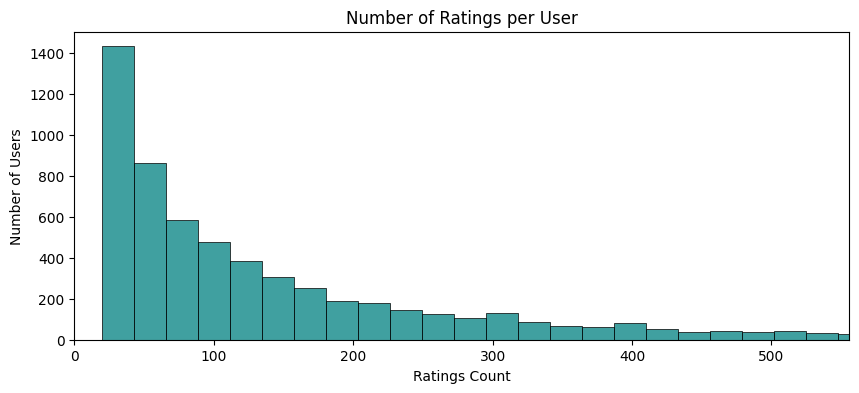

<ipython-input-5-90e05cdea255>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")


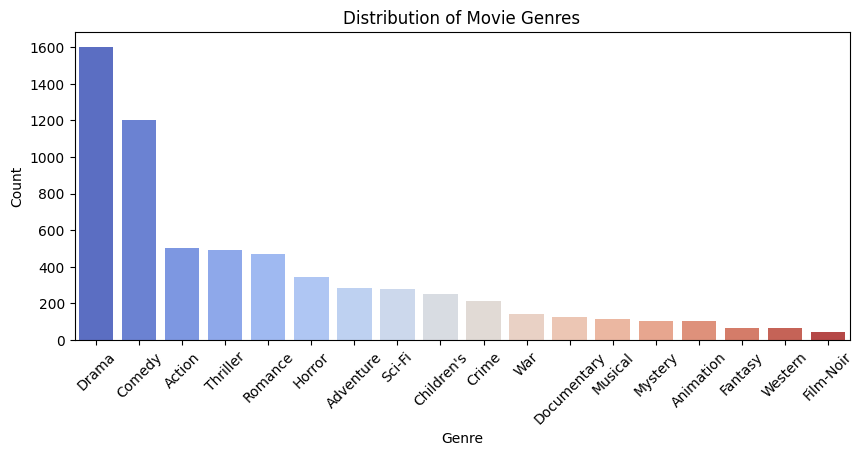

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ====================
# EDA for MovieLens
# ====================

# Check the first few rows of ratings and movies
print("MovieLens Ratings Head:")
print(ratings.head())
print("\nMovieLens Movies Head:")
print(movies.head())

# Summary statistics for ratings
print("\nRatings Summary:")
print(ratings.describe())

# Distribution of ratings
plt.figure(figsize=(8, 4))
sns.countplot(x="Rating", data=ratings, palette="viridis")
plt.title("Distribution of Ratings in MovieLens")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Number of ratings per user
ratings_per_user = ratings.groupby("UserID").size()
plt.figure(figsize=(10, 4))
sns.histplot(ratings_per_user, bins=100, kde=False, color="teal")
plt.title("Number of Ratings per User")
plt.xlabel("Ratings Count")
plt.ylabel("Number of Users")
plt.xlim(0, np.percentile(ratings_per_user, 95))  # focus on the 95th percentile
plt.show()

# Check distribution of movies per genre:
# Since movies can have multiple genres separated by '|', split and count.
genre_list = movies['Genres'].str.split('|').explode()
genre_counts = genre_list.value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")
plt.title("Distribution of Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [9]:
# ====================
# EDA for MIND Dataset
# ====================

# Display head of behaviors and news DataFrames
print("\nMIND Behaviors Head:")
print(behaviors.head())
print(behaviors.columns)
print("\nMIND News Head:")
print(news.head())
print(news.columns)

# Check basic info and summary for news articles
print("\nNews Data Info:")
print(news.info())
print("\nNews Data Summary (for categorical columns):")
print(news.describe(include='object'))

# Distribution of news articles by category
if 'category' in news.columns:
    category_counts = news['category'].value_counts()
    plt.figure(figsize=(8, 4))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette="mako")
    plt.title("Distribution of News Articles by Category")
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# Optional: Visualize temporal distribution of impressions (if 'time' column is available)
if 'time' in behaviors.columns:
    # Convert time to datetime
    behaviors['time'] = pd.to_datetime(behaviors['time'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
    behaviors.dropna(subset=['time'], inplace=True)
    plt.figure(figsize=(10, 4))
    sns.histplot(behaviors['time'], bins=50, color="green")
    plt.title("Distribution of Impression Times (MIND)")
    plt.xlabel("Time")
    plt.ylabel("Count")
    plt.show()

# ====================
# Save some preprocessed versions if needed
# ====================
ratings.to_csv("movielens_ratings_preprocessed.csv", index=False)
movies.to_csv("movielens_movies_preprocessed.csv", index=False)
behaviors.to_csv("mind_behaviors_preprocessed.csv", index=False)
news.to_csv("mind_news_preprocessed.csv", index=False)



MIND Behaviors Head:
   1  U13740  11/11/2019 9:05:58 AM  \
0  2  U91836  11/12/2019 6:11:30 PM   
1  3  U73700  11/14/2019 7:01:48 AM   
2  4  U34670  11/11/2019 5:28:05 AM   
3  5   U8125  11/12/2019 4:11:21 PM   
4  6  U19739  11/11/2019 6:52:13 PM   

  N55189 N42782 N34694 N45794 N18445 N63302 N10414 N19347 N31801  \
0  N31739 N6072 N63045 N23979 N35656 N43353 N8129...               
1  N10732 N25792 N7563 N21087 N41087 N5445 N60384...               
2  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...               
3                        N10078 N56514 N14904 N33740               
4  N39074 N14343 N32607 N32320 N22007 N442 N19001...               

                                   N55689-1 N35729-0  
0  N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...  
1  N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...  
2                N35729-0 N33632-0 N49685-1 N27581-0  
3  N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...  
4        N21119-1 N53696-0 N33619-1 N25722-0 N2869-0  
Inde